# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading the Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


## Data Preprocessing

- ### Duplicate values

In [5]:
print('Duplicated values in train, ', sum(train.duplicated()))
print('Duplicated values in test, ', sum(test.duplicated()))

Duplicated values in train,  0
Duplicated values in test,  0


- ### Missing Values

In [6]:
train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [7]:
test.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

- ### Class Imbalance

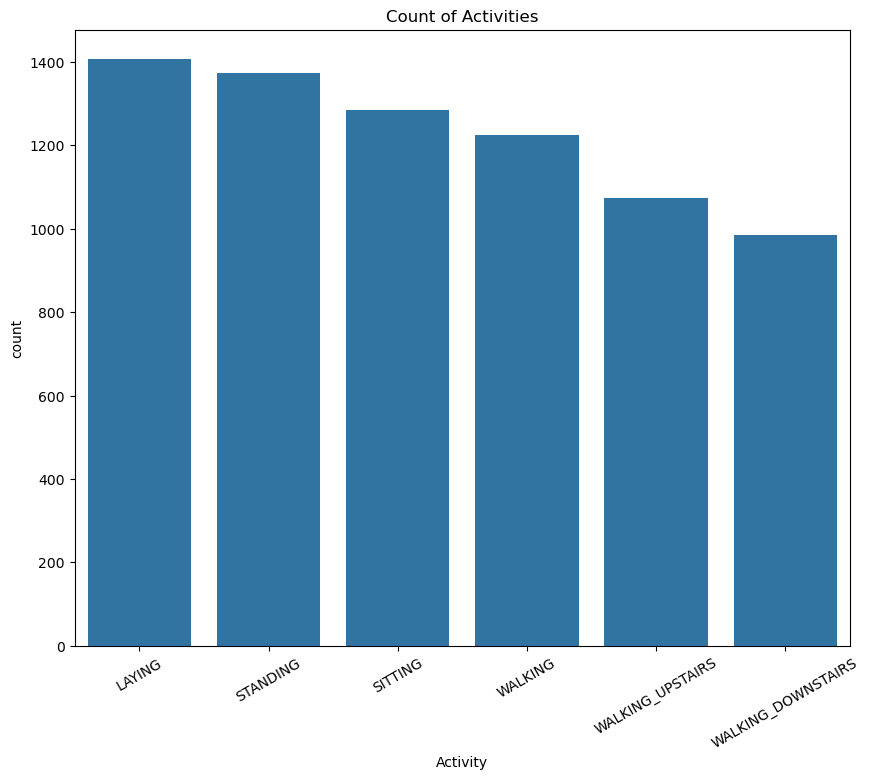

In [8]:
plt.figure(figsize = (10,8))
plt.title('Count of Activities')
sns.countplot(train, x = 'Activity', order = train['Activity'].value_counts().index)
plt.xticks(rotation = 30)
plt.show()

## Exploratory Data Analysis

In [9]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [10]:
from collections import Counter

In [11]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),
                       orient = 'index', columns = ['count']).sort_values(by = 'count', ascending = False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [12]:
import warnings
warnings.filterwarnings('ignore')

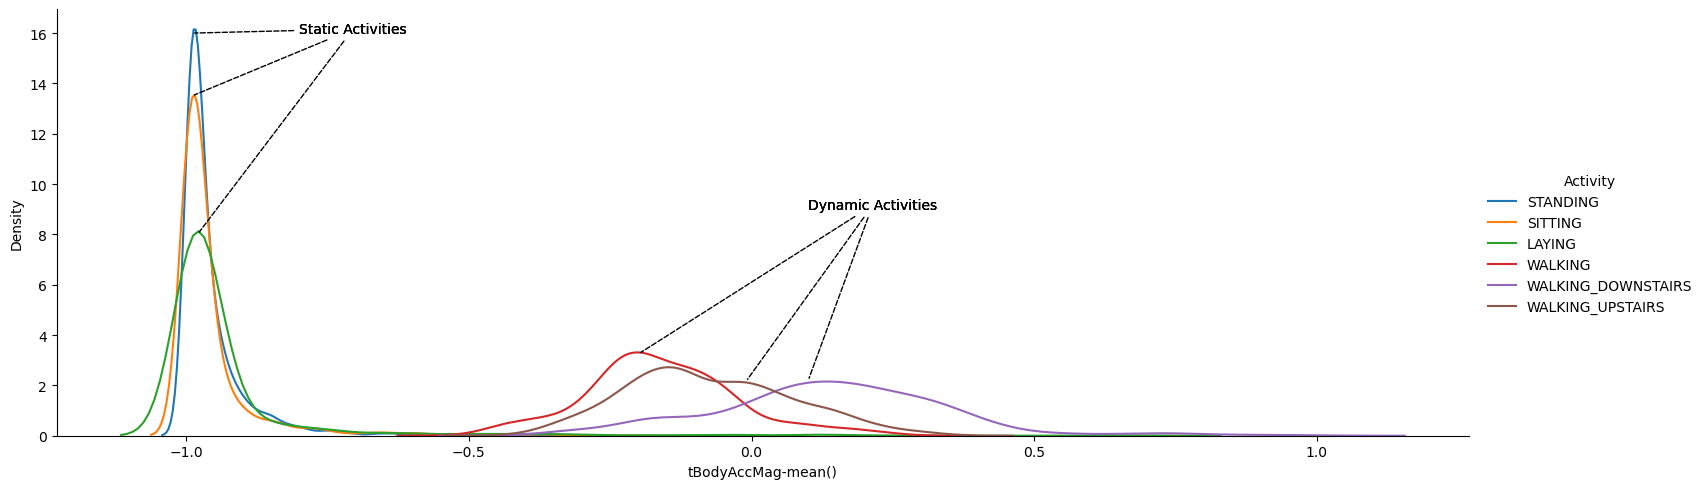

In [13]:
facet_grid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facet_grid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate('Static Activities', xy = (-.98,8), xytext=(-.8,16), arrowprops={'arrowstyle' : '-', 'ls': 'dashed'})
plt.annotate('Static Activities', xy = (-.99,13.5), xytext=(-.8,16), arrowprops={'arrowstyle' : '-', 'ls': 'dashed'})
plt.annotate('Static Activities', xy = (-.99,16), xytext=(-.8,16), arrowprops={'arrowstyle' : '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()

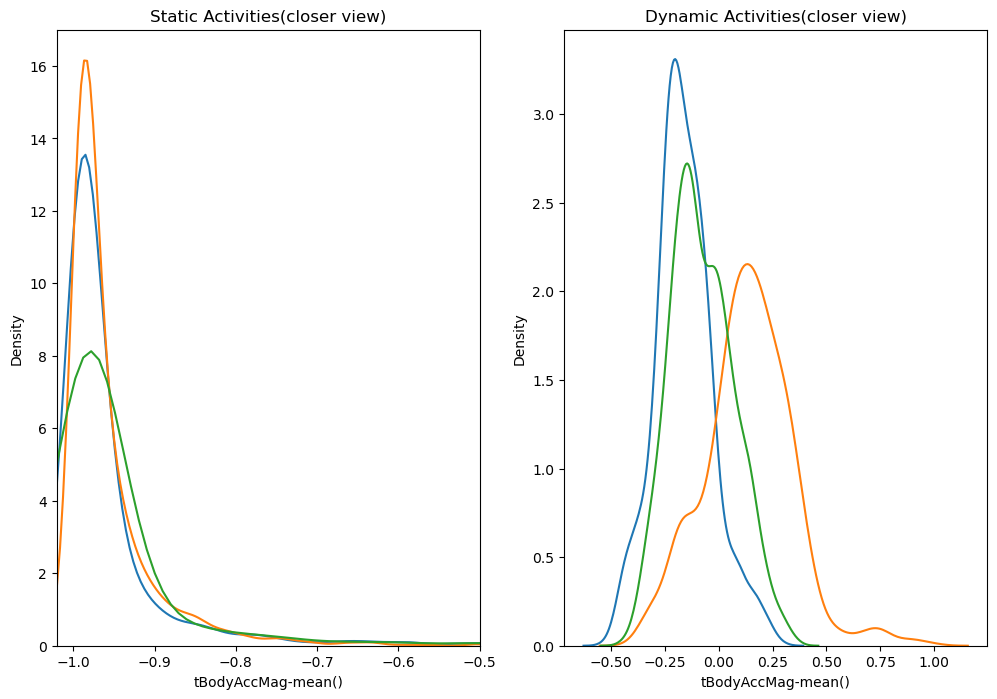

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 17])

plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()

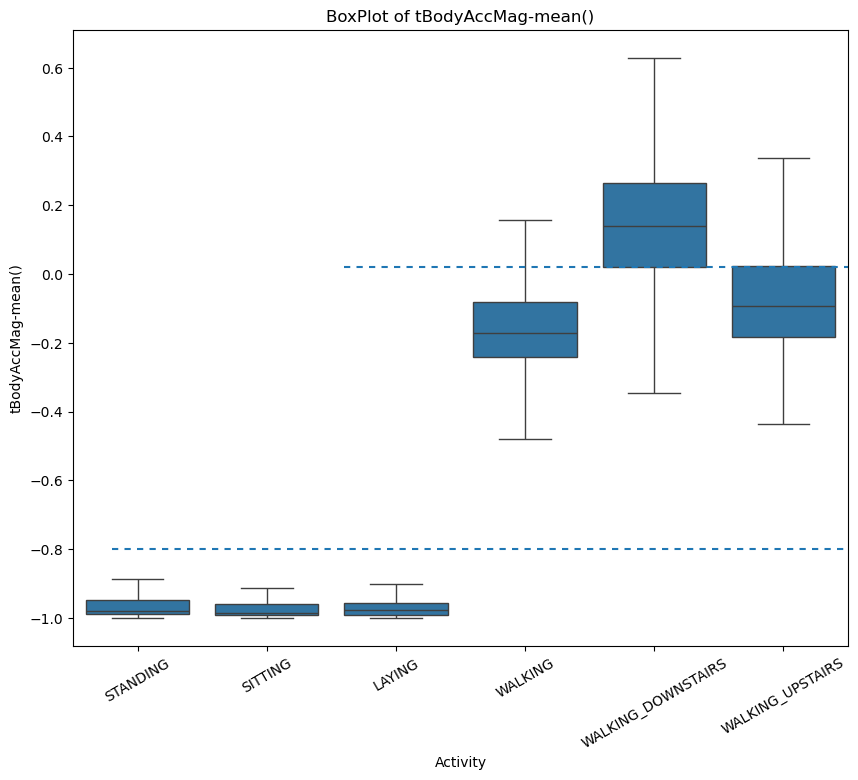

In [15]:
plt.figure(figsize = (10,8))
sns.boxplot(train, x = 'Activity', y = 'tBodyAccMag-mean()', showfliers = False)
plt.title('BoxPlot of tBodyAccMag-mean()')
plt.axhline(y = -0.8, xmin = .05, dashes = (3,3))
plt.axhline(y = 0.02, xmin = .35, dashes = (3,3))
plt.xticks(rotation = 30)
plt.show()

- ### Angle Betweeen Activity and X,gravityMean

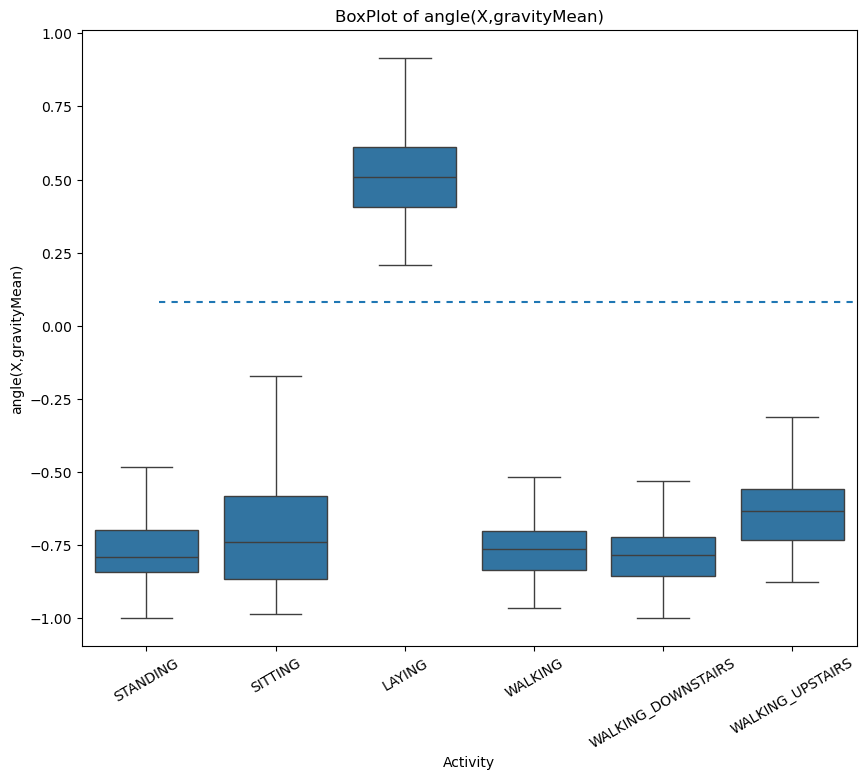

In [16]:
plt.figure(figsize = (10,8))
sns.boxplot(train, x = 'Activity', y = 'angle(X,gravityMean)', showfliers = False)
plt.title('BoxPlot of angle(X,gravityMean)')
plt.axhline(y = 0.08, xmin = 0.1, dashes = (3,3))
plt.xticks(rotation = 30)
plt.show()

- ### Angle Betweeen Activity and Y,gravityMean

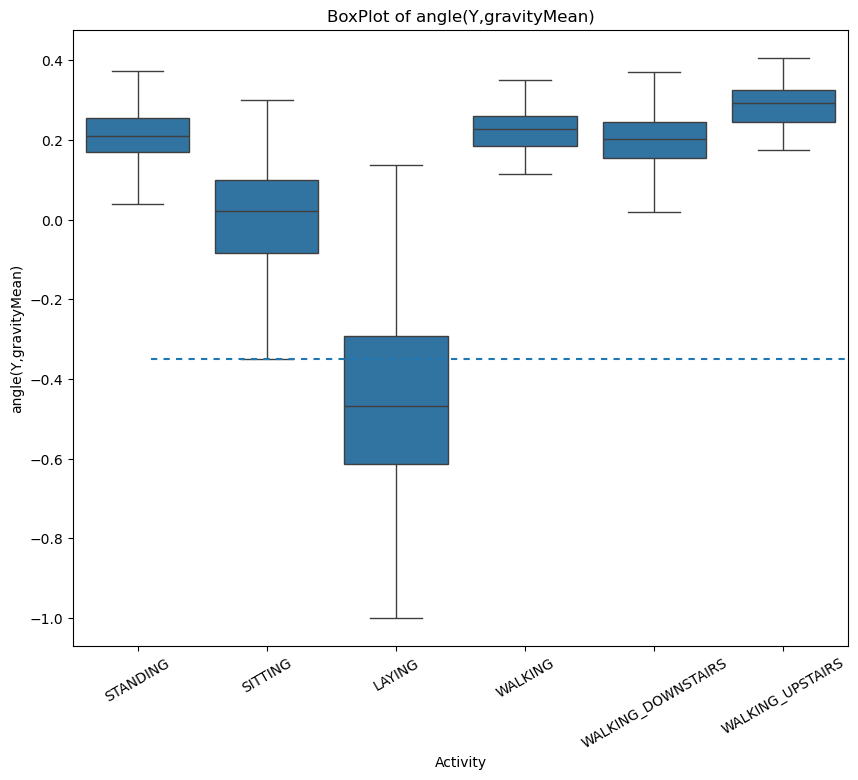

In [17]:
plt.figure(figsize = (10,8))
sns.boxplot(train, x = 'Activity', y = 'angle(Y,gravityMean)', showfliers = False)
plt.title('BoxPlot of angle(Y,gravityMean)')
plt.axhline(y = -.35, xmin = 0.1, dashes = (3,3))
plt.xticks(rotation = 30)
plt.show()

## Visualizing Data using PCA

In [18]:
x_pca = train.drop(columns = ['subject', 'Activity'])
pca = PCA(n_components = 2, random_state=0).fit_transform(x_pca)

In [19]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

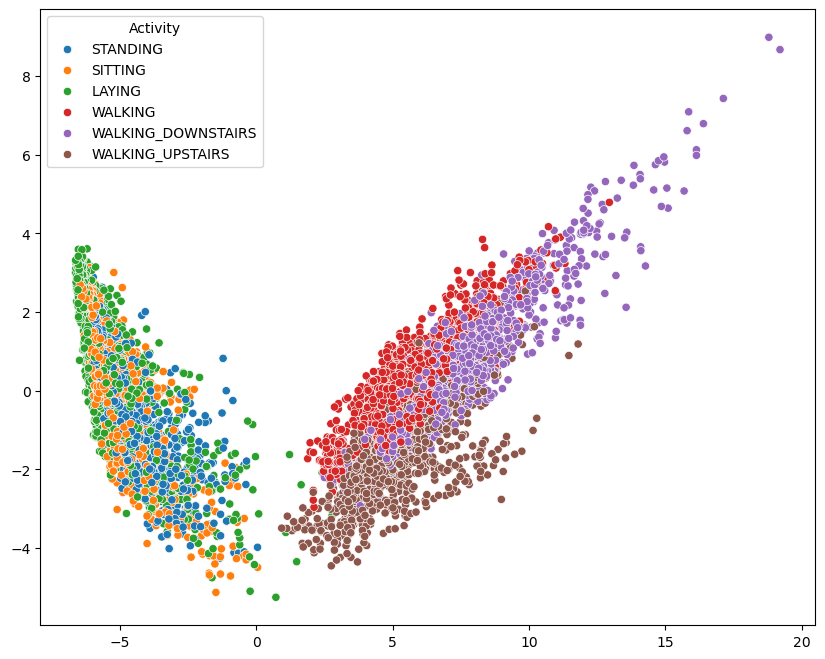

In [20]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()

## Visualizing using TSNE

In [21]:
x_tsne = train.drop(columns = ['subject', 'Activity'])
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_tsne)

In [22]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

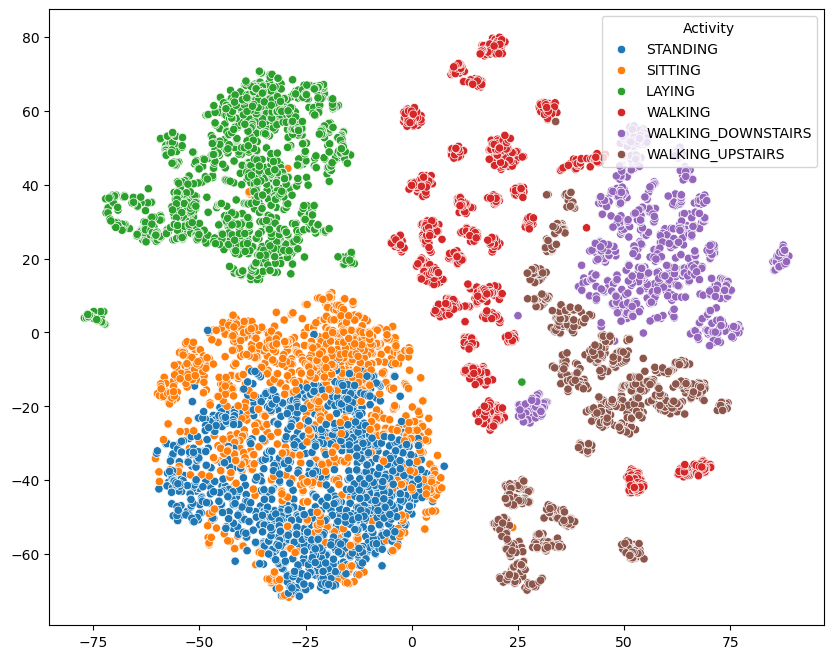

In [23]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

# ML Models

- ### Train Test Split

In [24]:
xtrain = train.drop(columns = ['Activity', 'subject'])
ytrain = train['Activity']

xtest = test.drop(columns = ['Activity', 'subject'])
ytest = test['Activity']


In [25]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(7352, 561) (7352,)
(999, 561) (999,)


##  Logistic regression model with Hyperparameter tuning and cross validation

In [26]:
parameters = {'max_iter' : [100,200,500]}
lr_model = LogisticRegression()
lr_model_rs = RandomizedSearchCV(lr_model, param_distributions=parameters, cv = 5, random_state=42)
lr_model_rs.fit(xtrain, ytrain)
lr_pred = lr_model_rs.predict(xtest)

In [27]:
accuracy_score(y_true = ytest, y_pred = lr_pred)

0.954954954954955

In [28]:
print('Accuracy Score for Logistic Regression:', accuracy_score)

Accuracy Score for Logistic Regression: <function accuracy_score at 0x0000025049F4D9E0>


In [29]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

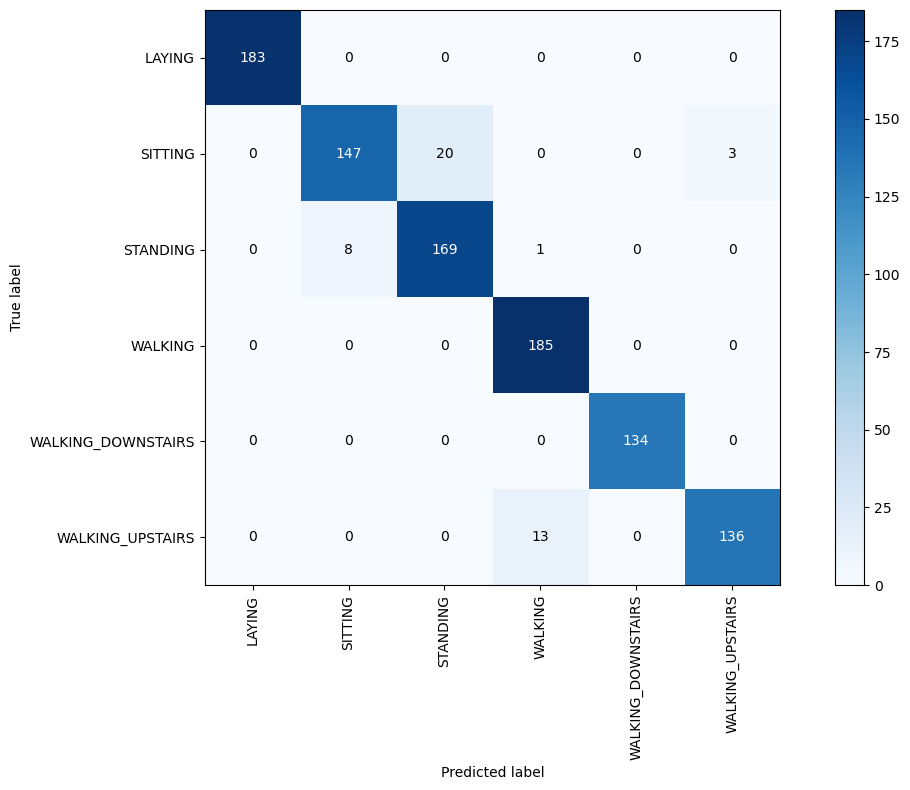

In [30]:
cm = confusion_matrix(ytest, lr_pred)
plot_confusion_matrix(cm, np.unique(lr_pred))

In [31]:
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)

In [32]:
get_best_randomsearch_results(lr_model_rs)

Best estimator :  LogisticRegression(max_iter=500)
Best set of parameters :  {'max_iter': 500}


##  Kernel SVM model with Hyperparameter tuning and cross validation

In [33]:
params_svc = {
    'kernel' : ['linear', 'rbf', 'sigmoid', 'poly'],
    'C' : [100,50,200]
}

svc_rs = RandomizedSearchCV(SVC(), param_distributions= params_svc, cv = 5, random_state = 42)
svc_rs.fit(xtrain, ytrain)
svc_pred = svc_rs.predict(xtest)

In [36]:
acc = accuracy_score(y_true = ytest, y_pred = svc_pred)
print('Accuracy Score for Support Vector Classifier:', acc)

Accuracy Score for Support Vector Classifier: 0.9679679679679679


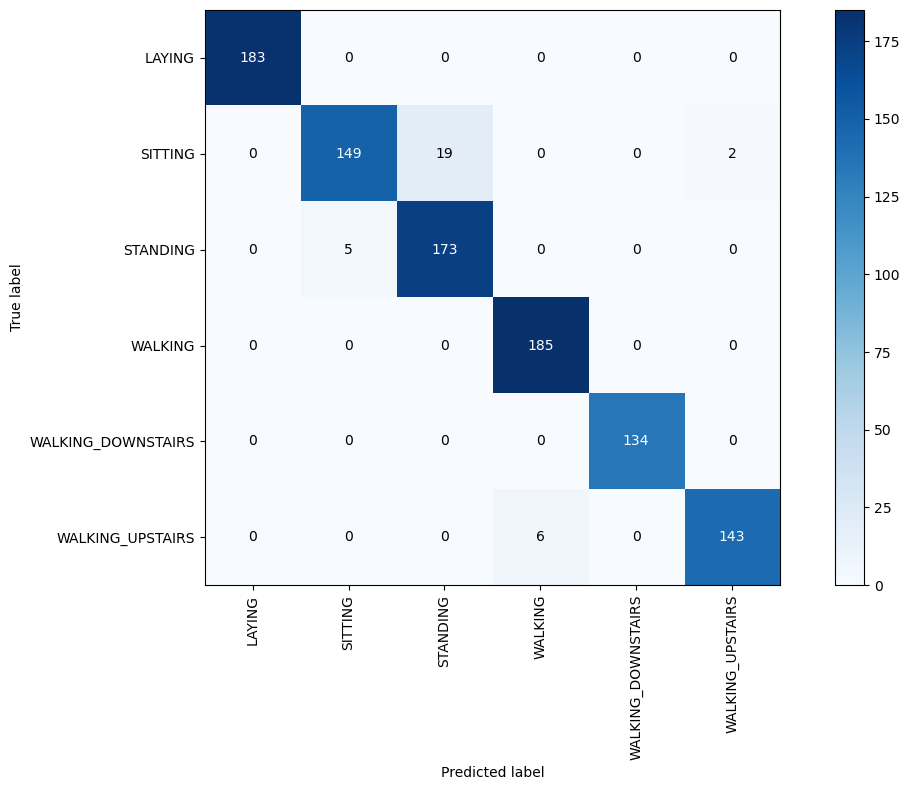

In [37]:
cm = confusion_matrix(ytest, svc_pred)
plot_confusion_matrix(cm, np.unique(svc_pred))

In [38]:
get_best_randomsearch_results(svc_rs)

Best estimator :  SVC(C=100)
Best set of parameters :  {'kernel': 'rbf', 'C': 100}


## Decision tree model with Hyperparameter tuning and cross validation

In [40]:
params_dt = {
    'max_depth' : np.arange(2,10,2)
}

dt_rs = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=params_dt, cv =5, random_state=42)
dt_rs.fit(xtrain, ytrain)
dt_pred = dt_rs.predict(xtest)

In [41]:
acc = accuracy_score(y_true = ytest, y_pred = dt_pred)
print('Accuracy Score for Decision Tree Classifier:', acc)

Accuracy Score for Decision Tree Classifier: 0.8558558558558559


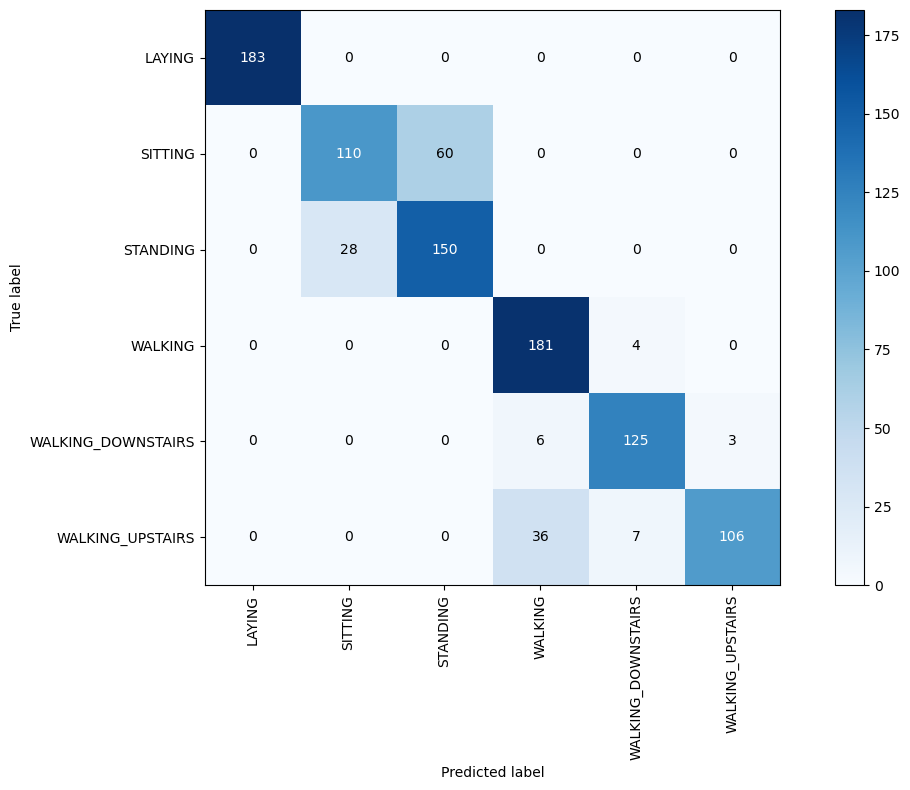

In [42]:
cm = confusion_matrix(ytest, dt_pred)
plot_confusion_matrix(cm, np.unique(dt_pred))

In [43]:
get_best_randomsearch_results(dt_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}


## Random forest model with Hyperparameter tuning and cross validation

In [46]:
params_rf = {
    'n_estimators' : np.arange(20,101,10),
    'max_depth' : np.arange(2,17,2)
}

rf_rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params_rf, cv = 5, random_state = 42)
rf_rs.fit(xtrain, ytrain)
rf_pred = rf_rs.predict(xtest)

In [47]:
acc = accuracy_score(y_true = ytest, y_pred = rf_pred)
print('Accuracy Score for Random Forest Classifier:', acc)

Accuracy Score for Random Forest Classifier: 0.91991991991992


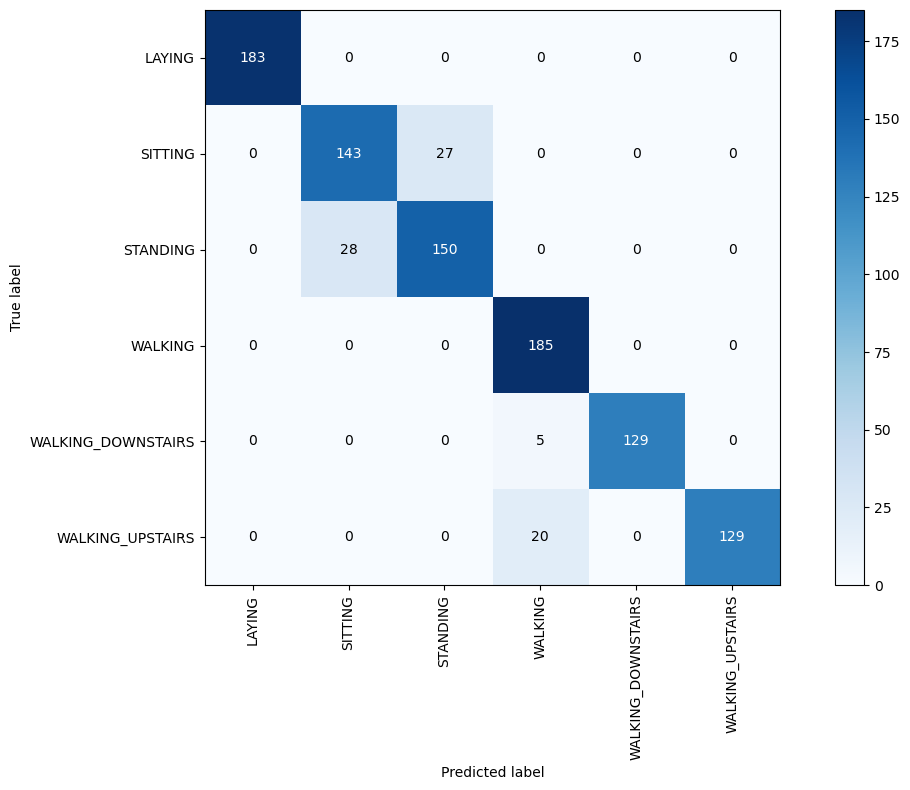

In [48]:
cm = confusion_matrix(ytest, rf_pred)
plot_confusion_matrix(cm, np.unique(rf_pred))

In [49]:
get_best_randomsearch_results(rf_rs)

Best estimator :  RandomForestClassifier(max_depth=14)
Best set of parameters :  {'n_estimators': 100, 'max_depth': 14}
